### Import libraries

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from PIL import Image
import numpy as np
import cv2

### 1. Read pictures

(1353, 2074)


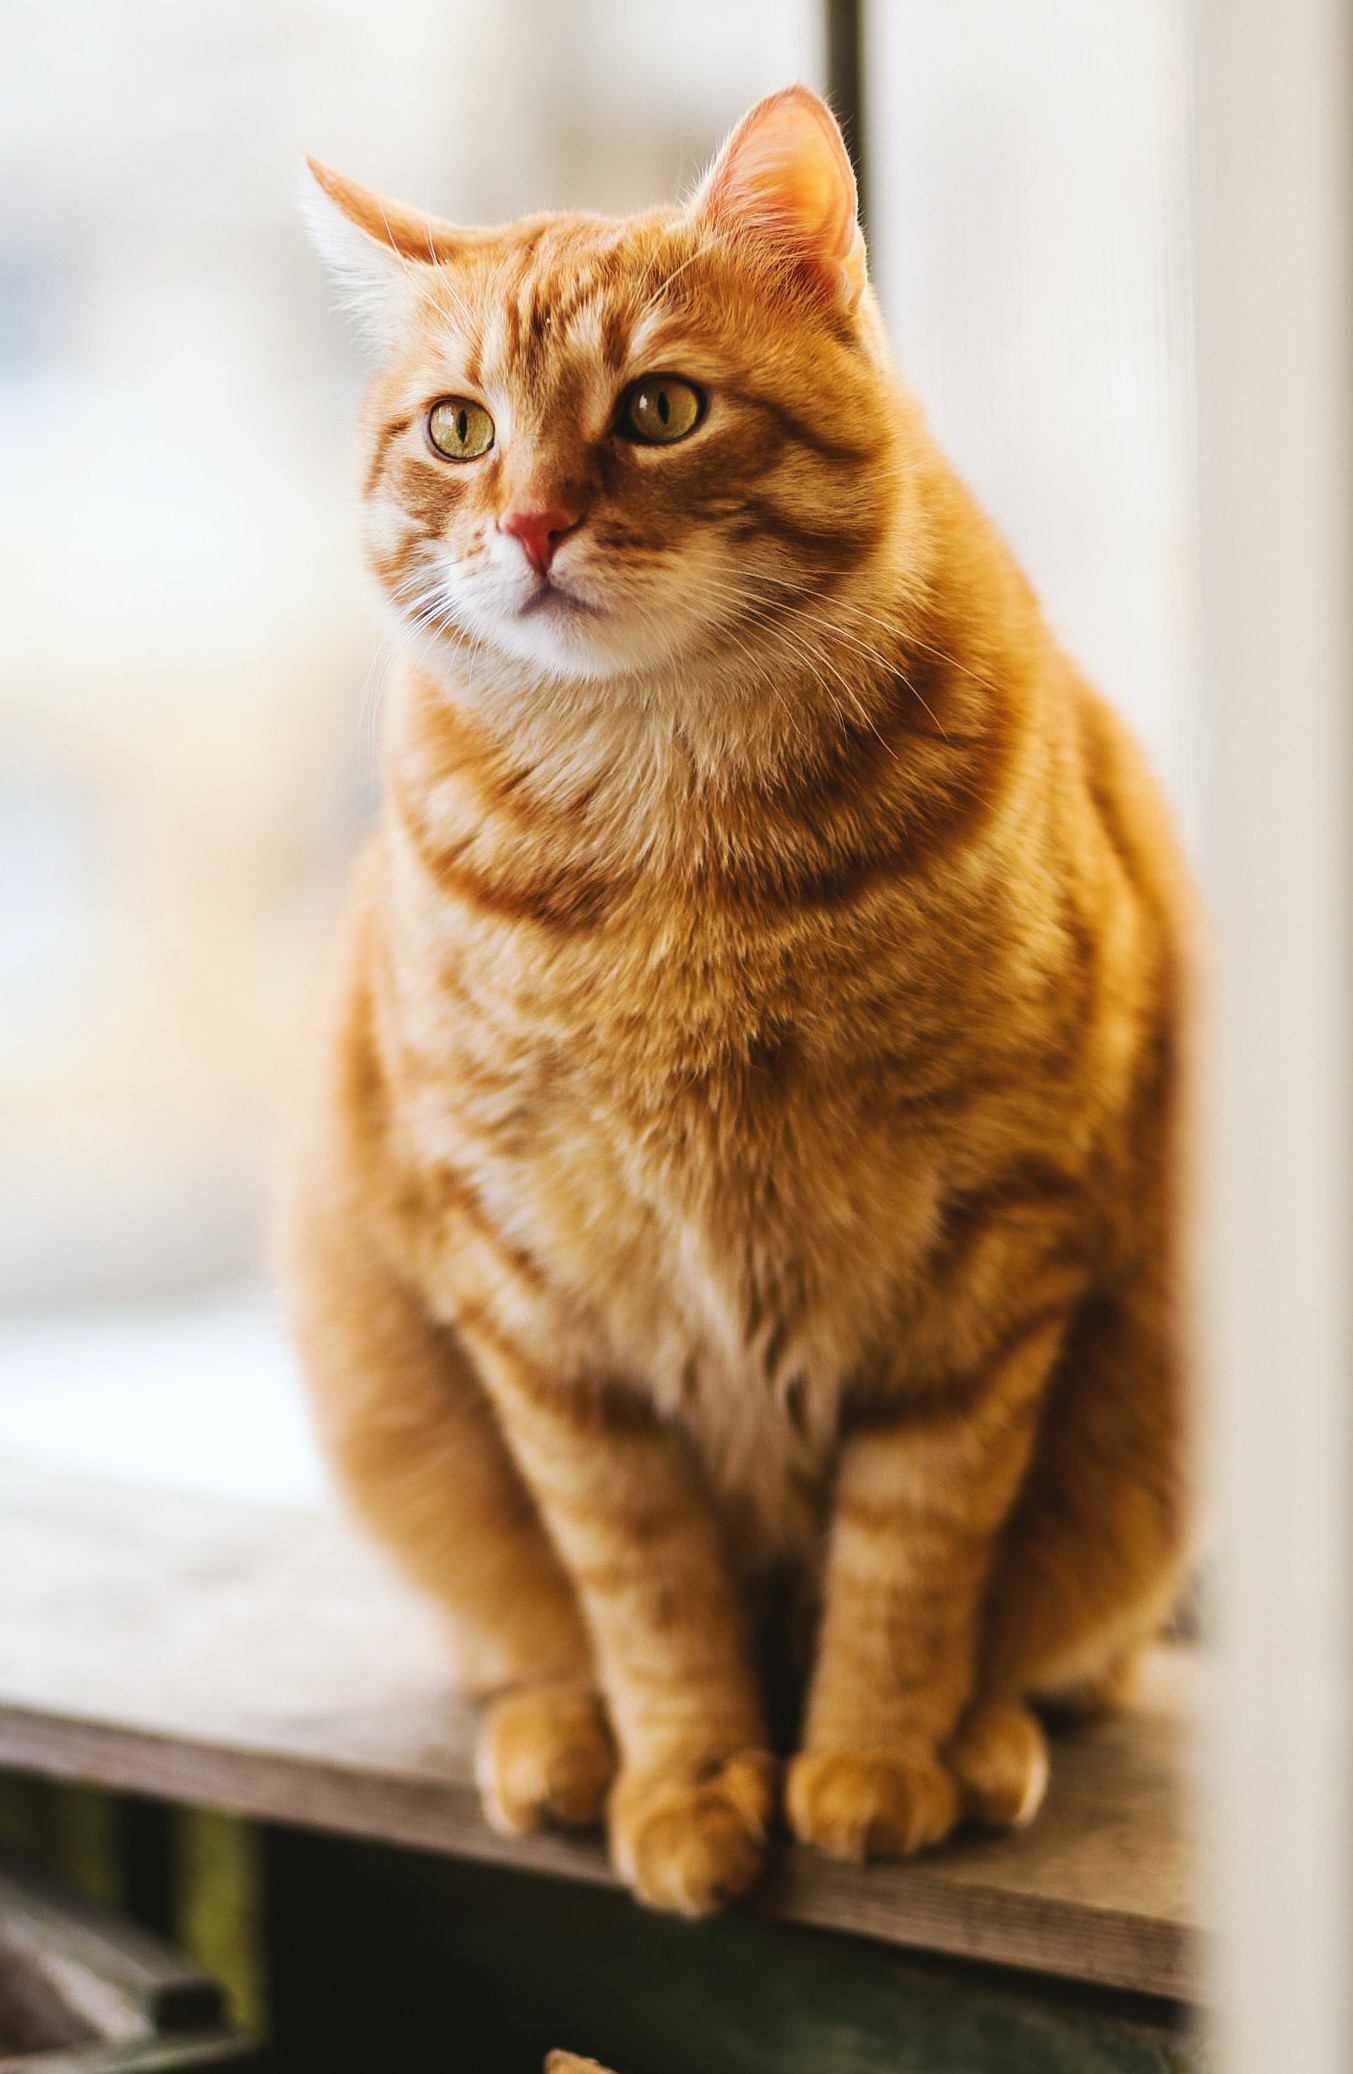

In [2]:
img = Image.open('./Picture/cat-1.jpg')
print(img.size)
img

### 2. Resize picture to ratio 1:2 (width x height)

In [3]:
img_2 = img.resize((img.size[0],img.size[0]*2 ), Image.LANCZOS)

(1353, 2706)


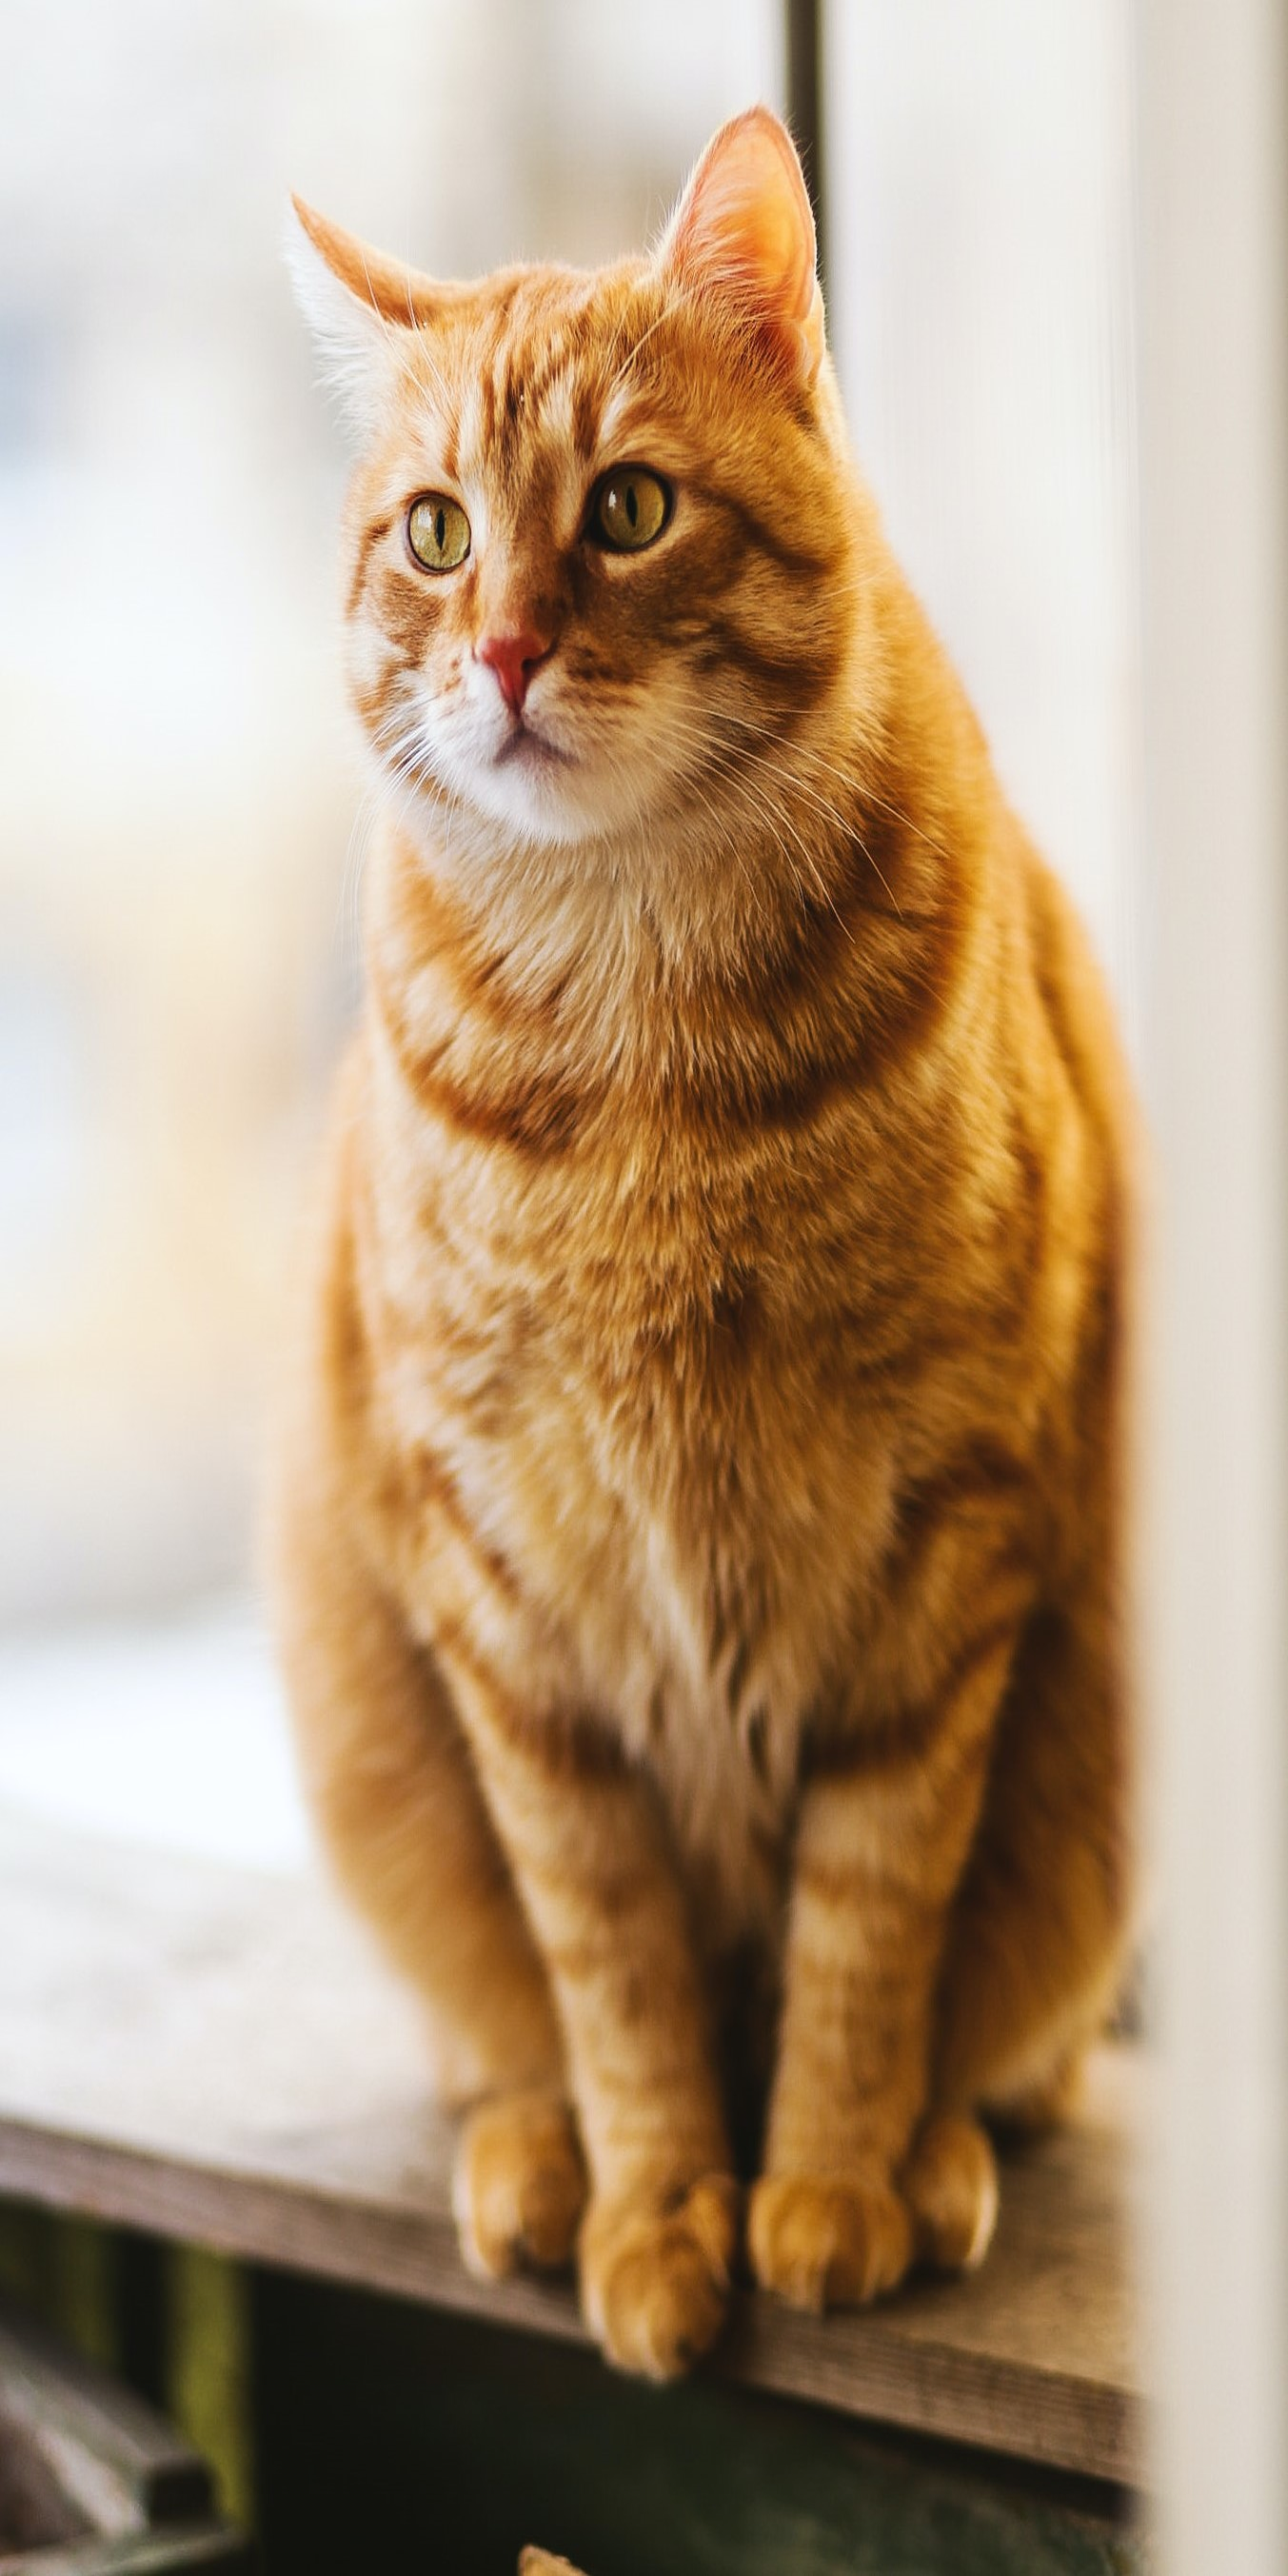

In [4]:
print(img_2.size)
img_2

### 3. Calculate Gradient 

In [5]:
pixel = np.array(img_2)

In [6]:
#0.299×giá-trị-red + 0.587×giá-trị-green + 0.114×giá-trị-blue
def gray_sequential(pixel):
    height, width, channel = pixel.shape
    pixel_list = pixel.tolist()
    gray_pixel = []
    for index_height in range(height):
        new_row = []
        for index_width in range(width):
            RGB_value = pixel_list[index_height][index_width]
            r = RGB_value[0]
            g = RGB_value[1]
            b = RGB_value[2]
            new_row.append(0.299*r+0.587*g+0.144*b)
        gray_pixel.append(new_row)
    return gray_pixel

In [7]:
def gray_numpy(rgb):
    return np.rint(np.dot(rgb, [0.299, 0.587, 0.114])).astype(np.uint8)

In [8]:
gray = gray_numpy(pixel)

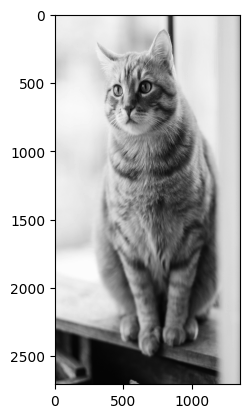

In [9]:
plt.imshow(gray,cmap='gray')

In [10]:
G_x = np.array([[-1, 0, 1],
                [-2, 0, 2],
                [-1, 0, 1]])
G_y = np.array([[-1,-2,-1],
                [ 0, 0, 0],
                [ 1, 2, 1]])

In [11]:
def convolution(gray,kernel):
    padded = np.pad(gray, pad_width=1,mode='edge')
    height, width               = padded.shape
    filter_height,filter_width   = kernel.shape
    if filter_height != 3 or filter_height!=3:
        print("ONLY SUPPORT 3*3 Filter!")
        return np.nan
    result = []
    for Row in range(1,height-1):
        fill_value = []
        for Col in range(1,width-1):
            sum_value = 0
            for filter_Row in range(filter_height):
                sum_value += np.sum(np.dot(padded[Row + filter_Row + -1][Col-1:Col+2], kernel[filter_Row]))
            fill_value.append(sum_value)
        result.append(fill_value)
    return np.array(result)

In [12]:
G_x_result = convolution(gray,G_x)

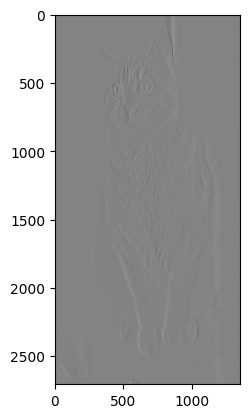

In [13]:
plt.imshow(np.array(G_x_result),cmap='gray')

#### 3.1 Compare with libraries

In [33]:
gray_cv = cv2.cvtColor(pixel, cv2.COLOR_RGB2GRAY)
gx_cv   = cv2.Sobel(gray_cv, cv2.CV_32F, dx=1, dy=0, ksize=3,borderType=cv2.BORDER_REPLICATE)
gy_cv   = cv2.Sobel(gray_cv, cv2.CV_32F, dx=0, dy=1, ksize=3,borderType=cv2.BORDER_REPLICATE)

In [17]:
gx_cv

array([[  0.,   0.,   0., ...,  -9., -15., -11.],
       [  0.,   0.,   0., ..., -10., -13.,  -9.],
       [  0.,   0.,   0., ...,  -9., -12.,  -8.],
       ...,
       [-22., -39., -18., ..., -10., -19., -14.],
       [-30., -52., -14., ...,  -8., -20., -16.],
       [-32., -56., -15., ...,  -8., -20., -16.]], dtype=float32)

In [18]:
G_x_result

array([[  0,   0,   0, ...,  -9, -15, -11],
       [  0,   0,   0, ..., -10, -13,  -9],
       [  0,   0,   0, ...,  -9, -12,  -8],
       ...,
       [-22, -39, -18, ..., -10, -19, -14],
       [-30, -52, -14, ...,  -8, -20, -16],
       [-32, -56, -15, ...,  -8, -20, -16]])

#### 3.2 Calculate magnitude and direction of gradient

In [22]:
Gx_sequence = convolution(gray,G_x)
Gy_sequence = convolution(gray,G_y)

In [65]:
magnitude_gradient = np.sqrt(np.square(Gx_sequence) + np.square(Gy_sequence))
direction_gradient = np.rad2deg(np.arctan2(Gy_sequence,Gx_sequence))

In [48]:
g, theta = cv2.cartToPolar(gx_cv, gy_cv, angleInDegrees=True) 

In [66]:
direction_gradient[direction_gradient<0]+=360

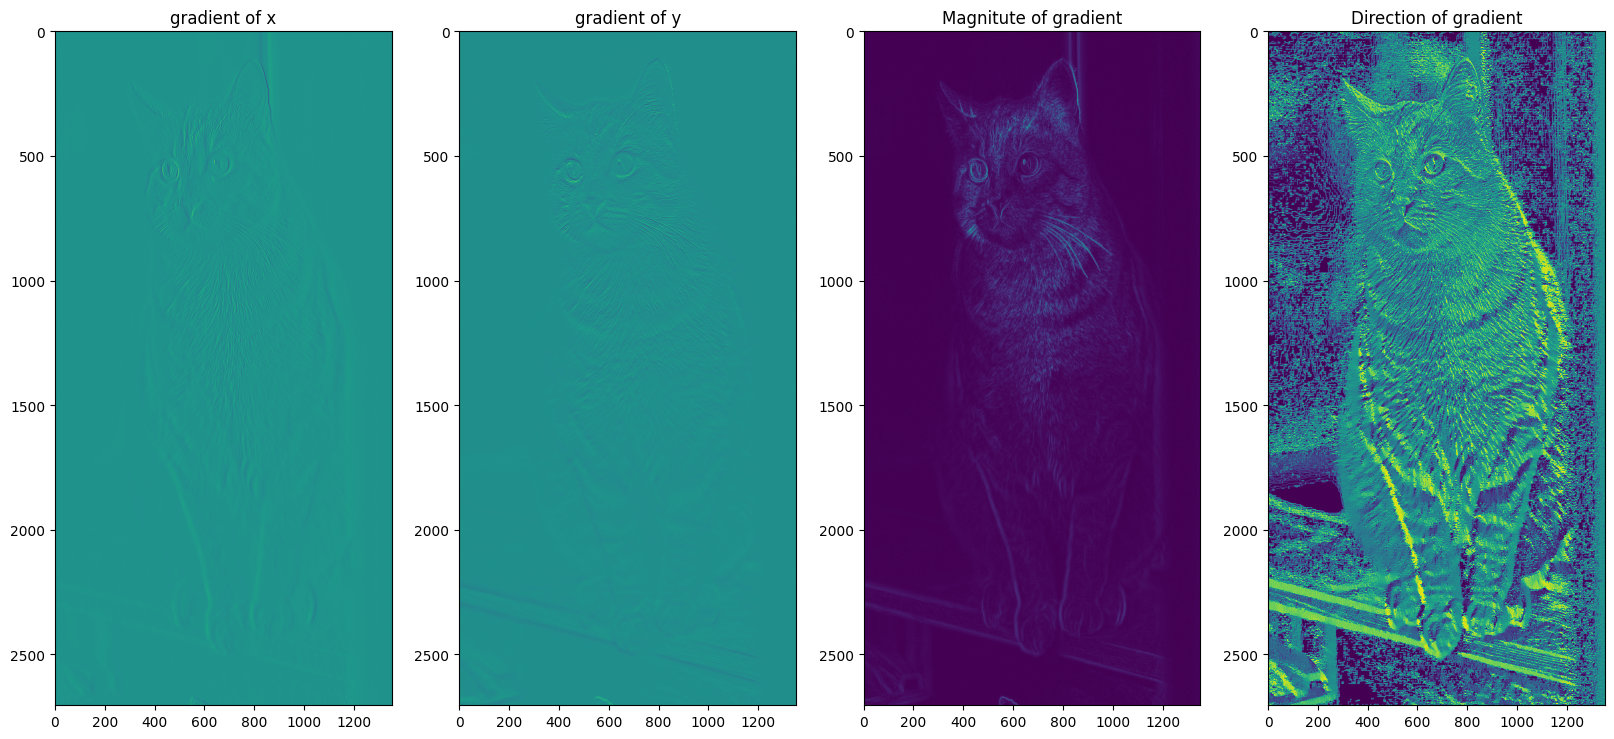

In [68]:
w = 20
h = 10

plt.figure(figsize=(w, h))
plt.subplot(1, 4, 1)
plt.title('gradient of x')
plt.imshow(gx_cv)

plt.subplot(1, 4, 2)
plt.title('gradient of y')
plt.imshow(gy_cv)

plt.subplot(1, 4, 3)
plt.title('Magnitute of gradient')
plt.imshow(g)

plt.subplot(1, 4, 4)
plt.title('Direction of gradient')
plt.imshow(theta)

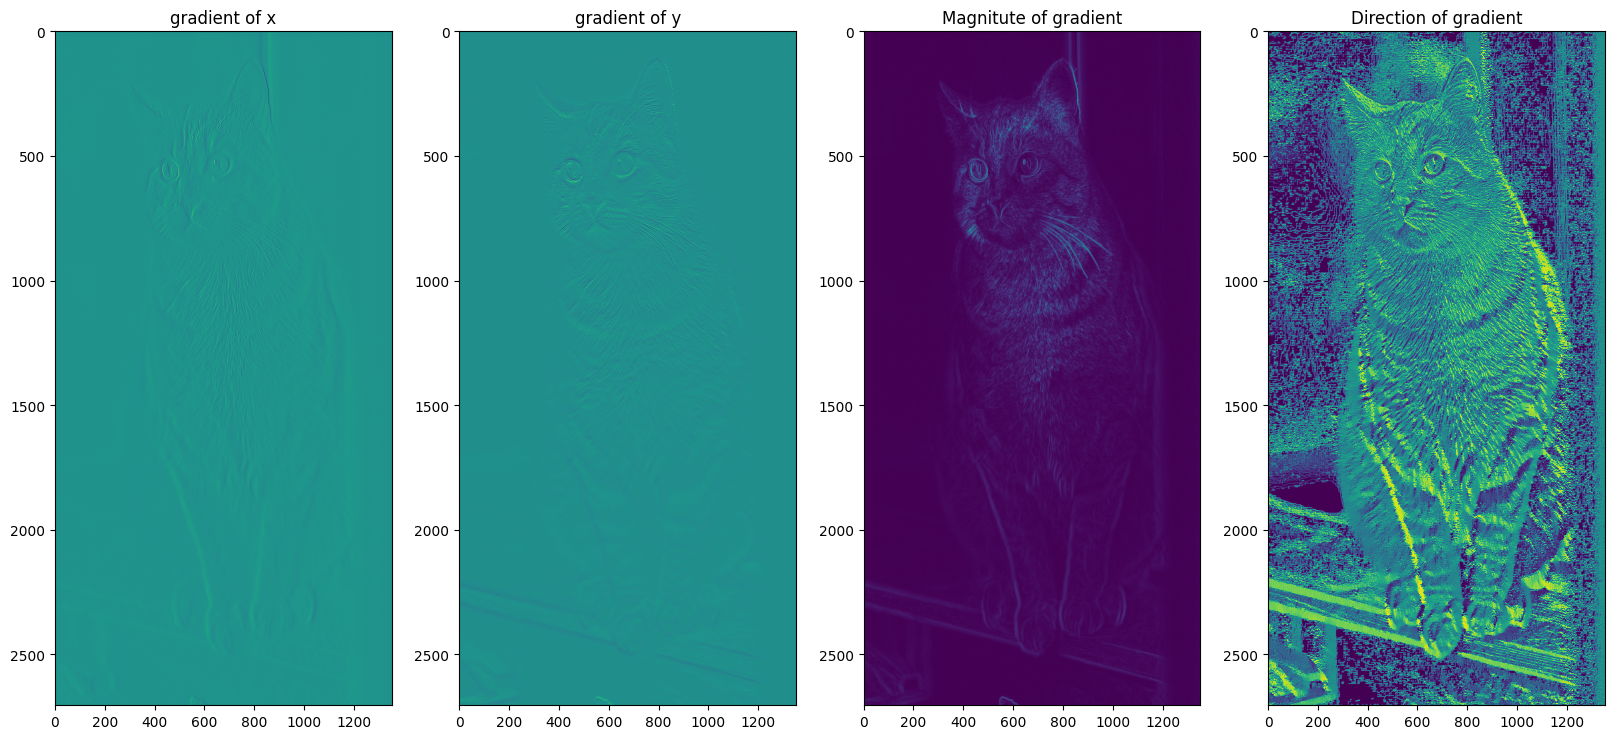

In [69]:
w = 20
h = 10

plt.figure(figsize=(w, h))
plt.subplot(1, 4, 1)
plt.title('gradient of x')
plt.imshow(Gx_sequence)

plt.subplot(1, 4, 2)
plt.title('gradient of y')
plt.imshow(Gy_sequence)

plt.subplot(1, 4, 3)
plt.title('Magnitute of gradient')
plt.imshow(magnitude_gradient)

plt.subplot(1, 4, 4)
plt.title('Direction of gradient')
plt.imshow(direction_gradient)